# 4. 파이차트 그리기
## 4.1 파이차트
- 각 범주(Category)가 데이터에서 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
            

In [2]:
import matplotlib.pyplot as plt

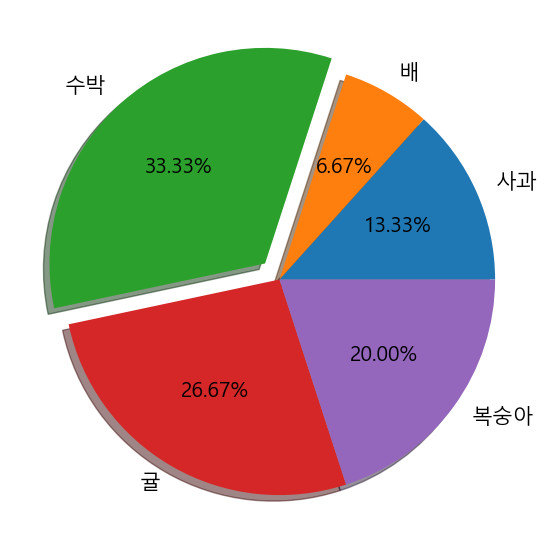

In [19]:
fruits = ['사과', '배', '수박', '귤', '복숭아']
counts = [20, 10, 50, 40, 30]

plt.figure(figsize = (7, 7))

plt.pie(counts, labels = fruits, 
        autopct = '%.2f%%', 
        textprops = {'fontsize': 15}, 
        shadow = True, 
        explode = [0, 0, 0.1, 0, 0])

plt.show()

([<matplotlib.patches.Wedge at 0x12176ca6580>,
 [Text(1.0048999936326264, 0.44741032933667013, '사과'),
  Text(0.5499999479716448, 0.9526279742014656, '배'),
  Text(-0.8029568139076438, 0.8917737128886932, '수박'),
  Text(-0.549999836482306, -0.9526280385698485, '귤'),
  Text(0.8899188390980269, -0.646563577553221, '복숭아')],
 [Text(0.5481272692541598, 0.24404199782000185, '13.33%'),
  Text(0.2999999716208971, 0.5196152586553449, '6.67%'),
  Text(-0.4683914747794589, 0.5202013325184044, '33.33%'),
  Text(-0.2999999108085305, -0.5196152937653719, '26.67%'),
  Text(0.485410275871651, -0.3526710423017569, '20.00%')])

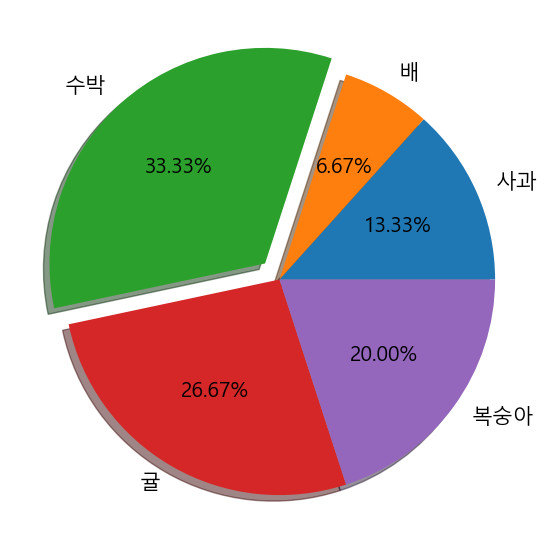

In [23]:
plt.figure(figsize = (7, 7))

wedge, texts, autopct = plt.pie(counts, labels = fruits, 
                                autopct = '%.2f%%', 
                                textprops = {'fontsize': 15}, 
                                shadow = True, 
                                explode = [0, 0, 0.1, 0, 0])

wedge, texts, autopct

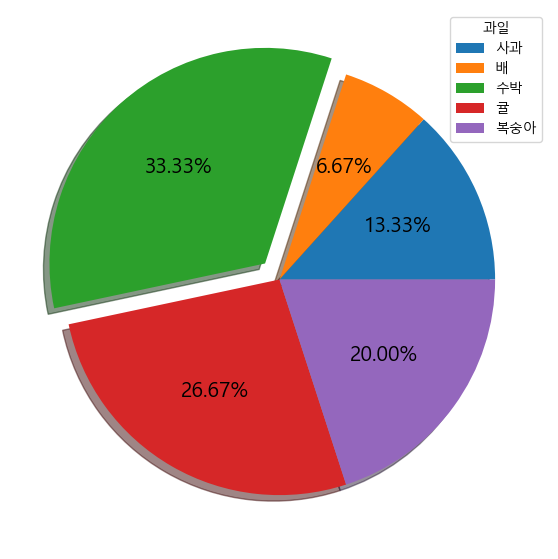

In [26]:
# label을 legend로 빼기
plt.figure(figsize = (7, 7))

wedge, texts, autopct = plt.pie(counts,
                                autopct = '%.2f%%', 
                                textprops = {'fontsize': 15}, 
                                shadow = True, 
                                explode = [0, 0, 0.1, 0, 0])

plt.legend(wedge, labels, title = '과일')

## 4.2 파이차트 활용
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreahtml5.kr/front/stats/browser/browserUseStats.do

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('data/webbrowser_share.xls', parse_dates = [0], index_col = 0)

In [45]:
# 2018년 08월 브라우저 점유율을 Pie Chart로 그려보자.
# 이때 브라우저의 수가 너무 많다. 그래서 유의미한 값만 출력하고 그 외는 하나로 묶어서 기타로 표현해보자.
# Chrome, IE, Edge, Safari, Whale Browser, Firefox는 그대로 출력하고 나머지는 기타로 묶는다.

# 기타 웹 브라우저의 점유율을 모두 합한 Series를 생성한다.
etc = df[df.columns[6:]].sum(axis = 1)

In [47]:
# 유의미한 값과 기타를 묶은 하나의 DataFrame을 생성한다.
web_df = df[df.columns[:6]].copy()
web_df['Etc'] = etc

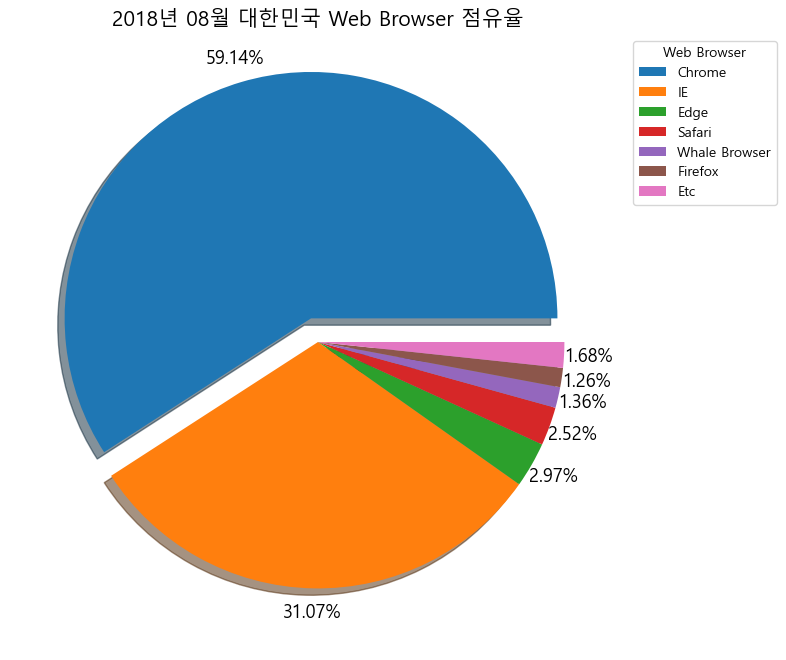

In [73]:
# 위의 DataFrame을 이용해 Pie Chart를 그린다.

plt.figure(figsize = (8, 8))

plt.title('2018년 08월 대한민국 Web Browser 점유율', fontsize = 15)

wedge, _, _ = plt.pie(web_df.loc['2018-08-01'], 
                      autopct = '%.2f%%', 
                      shadow = True, 
                      pctdistance = 1.1, 
                      textprops = {'fontsize': 13}, 
                      explode = [0.1, 0, 0, 0, 0, 0, 0]
                     )

plt.legend(wedge, web_df.columns, title = 'Web Browser', 
           bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

# 5 히스토그램(Histogram) 그리기
## 5.1 히스토그램

- 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 연속형 자료를 특정 구간(bin)으로 나눠 그 빈도를 나타낸 표
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [75]:
# 평균은 100, 표준편차는 10인 정규분포를 따르는 난수 1000개를 생성한다.
data = np.random.normal(100, 10, 1000)

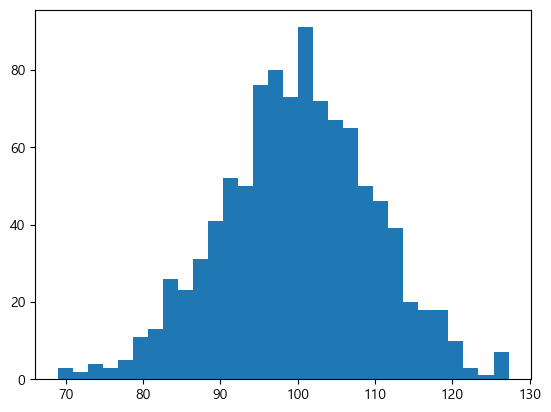

In [83]:
plt.hist(data, bins = 30)
plt.show()

## 5.2 히스토그램 활용
- tips.csv
    - 식당에서 팁을 지불한 손님의 정보를 모아둔 데이터 셋    

In [84]:
df = pd.read_csv('data/tips.csv')

### total_bill 의 분포를 시각화

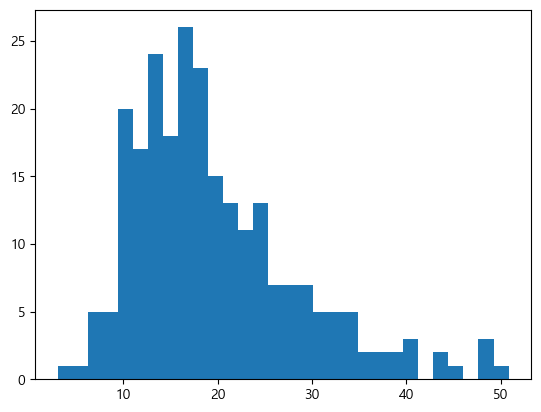

In [91]:
plt.hist(df['total_bill'], bins = 30)
plt.show()

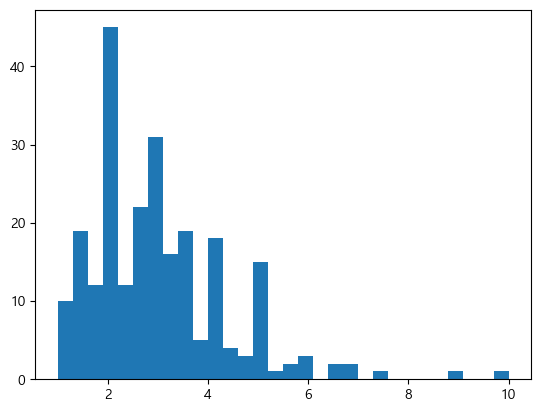

In [92]:
plt.hist(df['tip'], bins = 30)
plt.show()

# 6. 상자그래프(Boxplot) 그리기
## 6.1 상자그래프란
- 연속형 값들의 사분위수, 극단값들을 이용해 값들의 분포를 시각화한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - IQR을 이용해 극단치 계산하기
            - IQR(Inter Quatile Range): $3분위수 - 1분위수$ 로 중간 50%값의 범위
            - 극단적으로 작은값: 1분위 - $IQR(3분위수-1분위수) * whis$   보다 작은 값들
            - 극단적으로 큰값: 3분위 + $IQR(3분위수-1분위수) * whis$  보다 큰 값들

In [3]:
# Boxplot을 사용해보기 위해 먼저 data를 생성한다.
import matplotlib.pyplot as plt

import numpy as np
data = np.random.randint(1, 100, 1000)
data[:5] = [200, 250, -50, -60, -80]

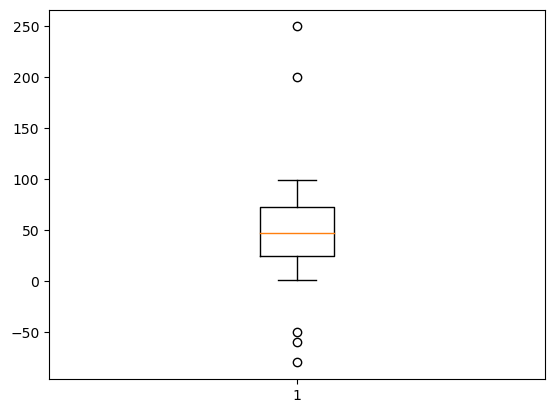

In [4]:
plt.boxplot(data)
plt.show()

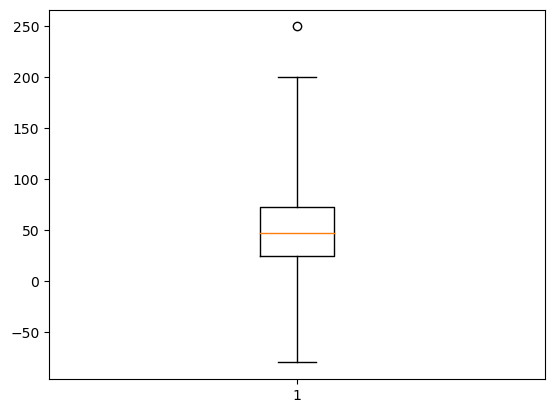

In [5]:
plt.boxplot(data, whis = 3)
plt.show()

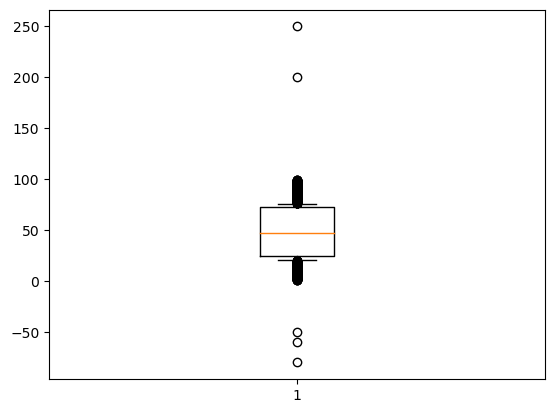

In [6]:
plt.boxplot(data, whis = 0.1)
plt.show()

## 상자그래프 활용
- tips_df 에서 tip의 분포를 상자그래프로 확인

In [1]:
import pandas as pd

tips = pd.read_csv('data/tips.csv')

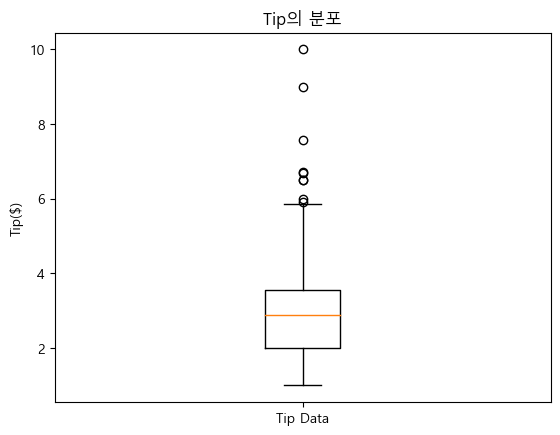

In [2]:
import matplotlib.pyplot as plt

plt.boxplot(tips['tip'])

plt.title('Tip의 분포')
plt.ylabel('Tip($)')
plt.xticks([1], labels = ['Tip Data'])

plt.show()

- 남녀별 tip의 분포를 하나의 boxplot에서 그려 비교
- 한 그래프에서 여러 데이터셋의 boxplot을 그리기.
    - 2차원 배열형태의 구조로로 데이터를 제공
    - 행(axis=0) 별로 그래프를 그린다.

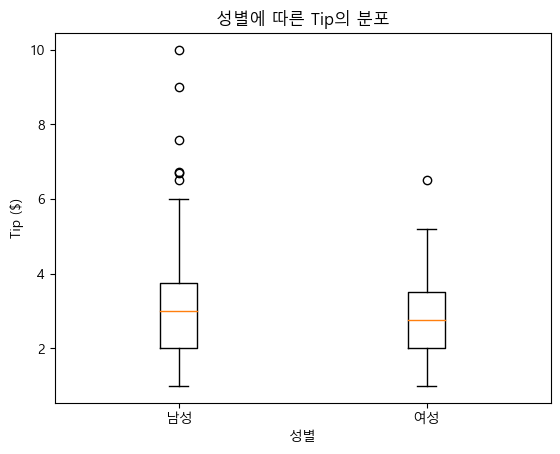

In [7]:
# 남성 tip data 추출
male_tip = tips.loc[tips["sex"] == 'Male', 'tip']
female_tip = tips.loc[tips["sex"] == 'Female', 'tip']

plt.boxplot([male_tip, female_tip], labels = ['남성', '여성'])

plt.title('성별에 따른 Tip의 분포')
plt.xlabel('성별')
plt.ylabel('Tip ($)')

plt.show()

In [8]:
!pip install opencv-contrib-python

     --------------------------------------- 44.9/44.9 MB 14.2 MB/s eta 0:00:00


In [9]:
import cv2


In [14]:
# 이미지를 불러온다.
img = cv2.cvtColor(cv2.imread('img.jpg'), cv2.COLOR_BGR2RGB)
print(type(img), img.shape)

<class 'numpy.ndarray'> (471, 640, 3)


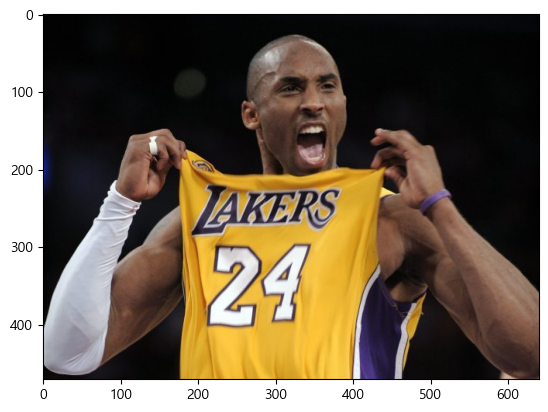

In [15]:
plt.imshow(img)
plt.show()

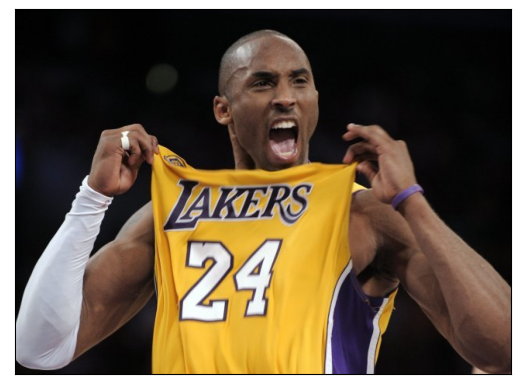

In [16]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

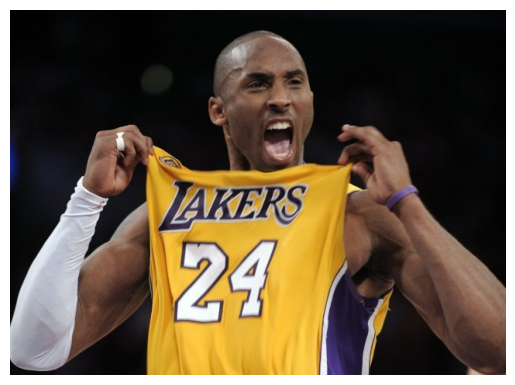

In [17]:
plt.imshow(img)
plt.axis('off')
plt.show()